# Modules

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import emojis

# Preprocessing

In [3]:
def istime(s):
    pattern = '^([0-9]+)/([0-9]+)/([0-9]+), ([0-9]+):([0-9]+)[ ]?' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

def isNotif(m):
    if len(m.split(": ")) >=2:
        return True
    return False

def get_slice_data(s):
    Line = s.split(' - ') 
    dateTime = Line[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(Line[1:])
    if isNotif(message):
        splitMessage = message.split(':') 
        name = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        name = "Notifications"
        

    return date, time, name, message


In [13]:
raw_data = open("test.txt","r")
raw_data = raw_data.read().replace("\u202f", " ").split("\n")

lindata= []
buff = ""

for lin in raw_data:
    if istime(lin):
        lindata.append(buff)
        buff = ""
    buff += lin
    #print(istime(lin))

lindata = lindata[1:]
#lindata

In [14]:
data=dict()
data["Date"] = []
data["Time"] = []
data["Name"] = []
data["Message"] = []

for lin in lindata:
    date, time, name, message = get_slice_data(lin)
    data["Date"].append(date)
    data["Time"].append(time)
    data["Name"].append(name)
    data["Message"].append(message)
#data
df = pd.DataFrame(data,columns=['Date', 'Time', 'Name', 'Message'])
df["Date"] = pd.to_datetime(df["Date"])
#df[100:200]
    

C:\Users\Ravi teja\AppData\Local\Temp\ipykernel_16844\2367315515.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [15]:
people = list(set(data["Name"]))
people.pop(people.index("Notifications"))
people

['Abhay', 'praneeth', 'Ram Raj', 'Ravi Varma', 'Vamsi', 'Ravi Teja', 'Teja']

<BarContainer object of 7 artists>

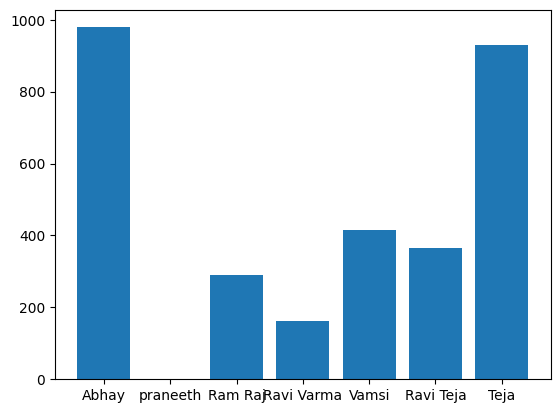

In [27]:
x=people
y=[]
for i in x:
    y.append(df[df["Name"] == i].shape[0])
plt.bar(x,y)
#plt.pie(y)